# Introduction to Pandas

In this notebook we will go over some basics of the python module ```pandas``` using Python 3.5 (and above). 


## The toy dataset

We will use the dataset available [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).
Read the information here to understand what the dataset is all about. 

The dataset contains information about the perceived quality of a particular brand of Portuguese wine.  

Each row will represent a particular red wine variant and each column will contain the following:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

We will use the data to learn more about working with ```pandas```.


## Downloading the data:

Visit [this link](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) and save the CSV file to the **same folder** where you have saved **this notebook** without altering the suggested name. 


This is a CSV (Comma Separated Values) file. Go ahead and open it with a **text editor**.

![title](csv_head.png)

You can see that these are not comma separated values and they are separated by a ```;```. Generally values in CSV files can be separated by various different characters such as space, commas, tabs, colons and semi-colons. 

In [14]:
# Loading the pandas module with the name 'pd' 
import pandas as pd 

In [15]:
redwine = pd.read_csv('winequality-red.csv')  # read the csv file

In [16]:
redwine.head()  # display the first 5 rows of the CSV

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


It seems that something has broken... 


Normally when we use the ```.read_csv ``` method of pandas, it assumes that the delimiter between values is a ```,```. In cases where this is not (such as ours) we can explicitly specify the delimiter. 

In [17]:
redwine = pd.read_csv('winequality-red.csv', sep=';')  # read the csv file separated with a semicolon ;

In [18]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This is much more readable.

The object ```redwine``` is a ```pandas.DataFrame``` object which we will use very extensively during the course. 

Let's investigate what is inside this dataframe. 

In [19]:
redwine.info()  # This prints out some basic stats about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From this summary we can see the names of our columns, the number of non-empty rows, and the type of each column. In our case they are all floating point numbers (```float64```) except the last one, the quality. This is an integer. 

Now let's visualize some of the data. 

We can plot the ```pH``` and the ```citric acid``` columns to see if there is something interesting there.
To plot we use the ```.plot()``` method of a ```pandas.DataFrame``` object. 

We have to specify what values we want plotted along the x and y axes. There are also many other options (see [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)).


<AxesSubplot:xlabel='citric acid'>

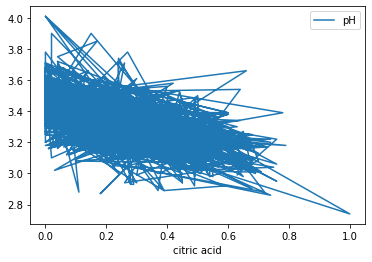

In [20]:
# Plotting age on the x axis and the number of nodes on the y axis
redwine.plot(x='citric acid', y='pH')

This is not very useful.

Pandas has drawn a line between points where there should be none.
We a scatter plot. We can use ```pandas.plot.scatter``` instead of just ```pandas.plot```. 

<AxesSubplot:xlabel='citric acid', ylabel='pH'>

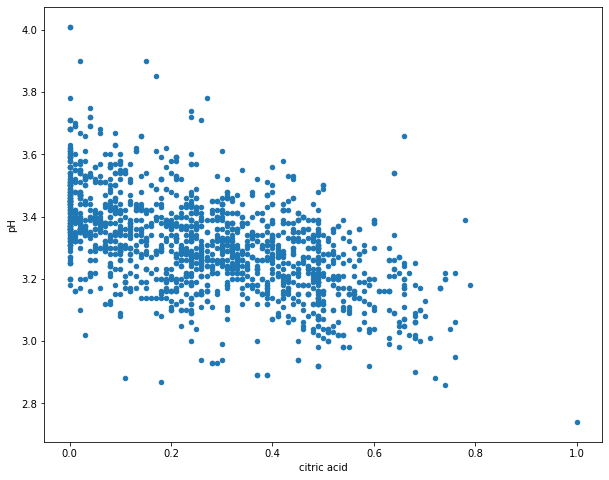

In [21]:
# The figure is also too small let's increase the size by adjusting the figsize (x_size, y_size) option
redwine.plot.scatter(x='citric acid', y='pH', figsize=(10, 8))

Intuitively, the ```pH``` level decreases as the concentration of ```citric acid``` increases. 

What about wine density? My theory is is that the more ```alcohol``` the lower the ```density``` since alcohol is generally lighter than fruit juice. 

<AxesSubplot:xlabel='alcohol', ylabel='density'>

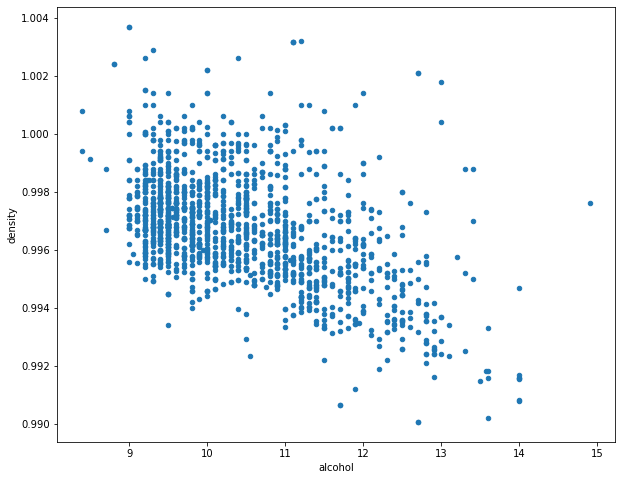

In [22]:
redwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8))

It seems that there is some correlation here as the alcohol level goes up.

What if we wanted to see this effect but only for wines that are bad?

First we will have to find out what is bad wine. We will define it as wines that have a lower than mean quality score.  

Therefore we must first find the mean value of the ```quality``` column. In pandas we can select a column like we would the index of a list like so:

In [23]:
redwine['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

These are all the column values. 

Pandas columns are ```pandas.Series``` objects and have most of the functionality of ```numpy arrays```. This means we can use mean, median and sum calculations. For now we will use the mean. 

In [24]:
ave_quality = redwine['quality'].mean()

In [25]:
print(ave_quality)

5.6360225140712945


Now that we know the mean, how do we select only those rows that have a quality value less than ```ave_quality```?

We can slice a ```pandas.DataFrame``` object by indexing it with conditional statements. 
This is because a conditional statement on on a dataframe returns a series of boolean values.
See the example below. 

In [26]:
# using a conditional statement on a pandas dataframe directly
redwine['quality'] < ave_quality

0        True
1        True
2        True
3       False
4        True
        ...  
1594     True
1595    False
1596    False
1597     True
1598    False
Name: quality, Length: 1599, dtype: bool

We can now pass this series of boolean values directly to a dataframe as we would a column. 
i.e. ```redwine[redwine['quality'] < ave_quality]``` returns only those rows in ```redwine``` where the value of the ```'quality'``` column is less than the value of ```ave_quality```. 

Therefore we can do the following:

In [27]:
# new dataframe with only the data about the dead
badwine = redwine[redwine['quality'] < ave_quality]

In [28]:
# Some summary statistics
badwine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         744 non-null    float64
 1   volatile acidity      744 non-null    float64
 2   citric acid           744 non-null    float64
 3   residual sugar        744 non-null    float64
 4   chlorides             744 non-null    float64
 5   free sulfur dioxide   744 non-null    float64
 6   total sulfur dioxide  744 non-null    float64
 7   density               744 non-null    float64
 8   pH                    744 non-null    float64
 9   sulphates             744 non-null    float64
 10  alcohol               744 non-null    float64
 11  quality               744 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 75.6 KB


In [29]:
# print the first 5 rows
badwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


Now we will go back and plot this. 

<AxesSubplot:xlabel='alcohol', ylabel='density'>

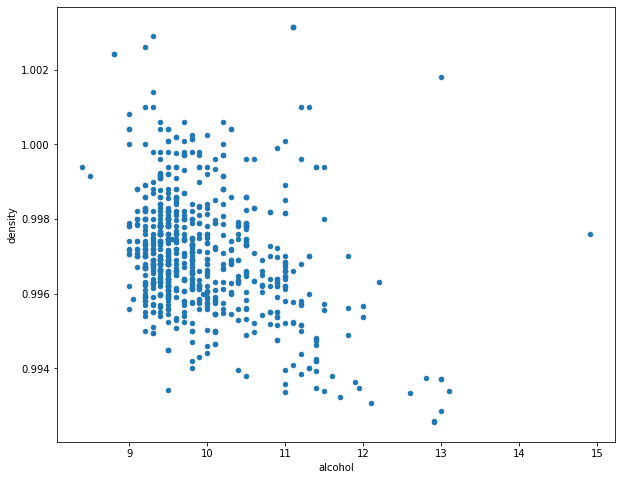

In [30]:
badwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8))

It's kind of hard to visually compare this to what we had before. 

Ideally we could plot these in the same figure. 

This is possible. In pandas, every ```.plot``` statement returns an ```axis``` object which is a reference to figure that the plot is being drawn upon. 

Further, every ```.plot``` statement also takes as an optional input an axis object. Therefore we can do the following:

<AxesSubplot:xlabel='alcohol', ylabel='density'>

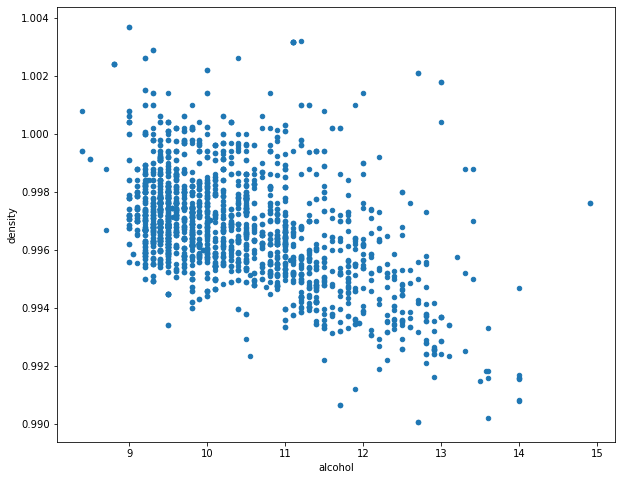

In [31]:
my_canvas = redwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8))
badwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8), ax=my_canvas)

So what happened?

We have plotted both plots on top of each other, however, they have the same exact color. We will need to change the color of one of them. 

Let's set the color of the second plot to ```red```. 

<AxesSubplot:xlabel='alcohol', ylabel='density'>

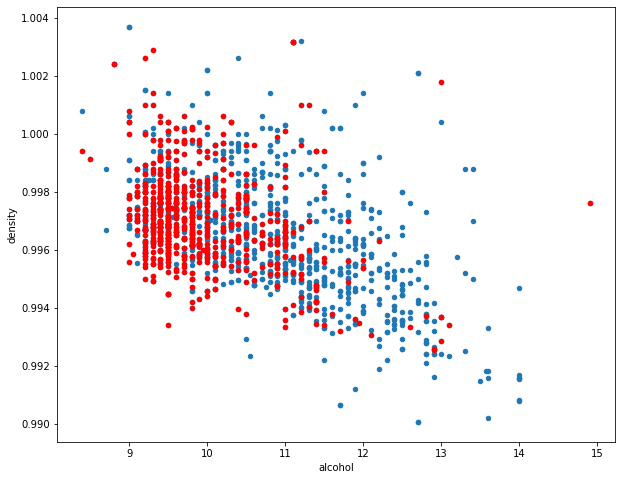

In [32]:
my_canvas = redwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8))
badwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8), ax=my_canvas, color='red')

Much more interesting. 

Not only do we find that ```density``` is related to ```alcohol``` but also that the red plot (bad wines) tend to all have a lower ```alcohol``` level. 

Perhaps ```alcohol``` is very important in wine quality.

We can look at just ```alcohol``` in histograms. 

First let's look at the ```alcohol``` distribution in all of our data. 

<AxesSubplot:ylabel='Frequency'>

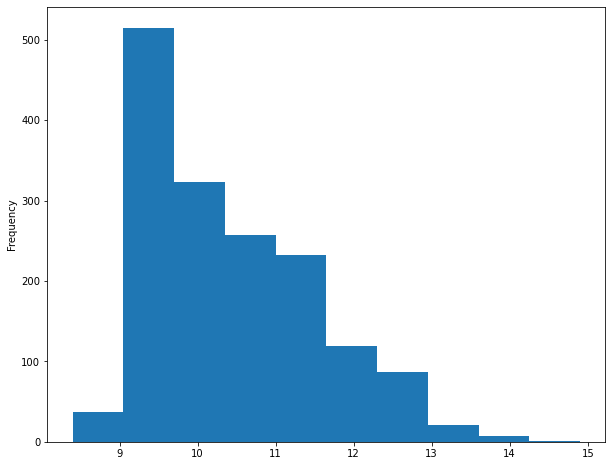

In [33]:
redwine['alcohol'].plot.hist(figsize=(10, 8))

On the y axis we see the frequency of ```alcohol``` levels specified on the x axis. 

Now let's plot them on top of each other like before. 

<AxesSubplot:ylabel='Frequency'>

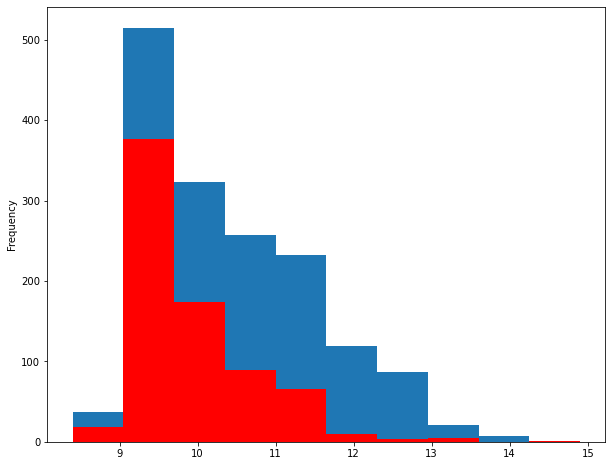

In [34]:
the_figure = redwine['alcohol'].plot.hist(figsize=(10, 8))
badwine['alcohol'].plot.hist(figsize=(10, 8), color='red', ax = the_figure)

This is not very informative. We want to compare ```alcohol``` levels _per-capita_. 

In other words, we want to normalise the frequency counts so that they represent **density** rather than frequency. 

The pandas ```.hist()``` method has an option ```density``` which we can set to true.

<AxesSubplot:ylabel='Frequency'>

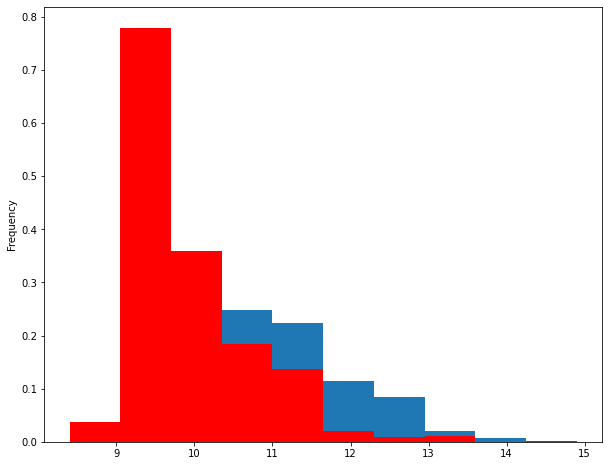

In [35]:
the_figure = redwine['alcohol'].plot.hist(figsize=(10, 8), density=True)
badwine['alcohol'].plot.hist(figsize=(10, 8), color='red', density=True)

We can now see very clearly that the _bad wine_ clearly has a lower ```alcohol``` content as the red histogram (corresponding to bad wines) is tighter around lower ```alcohol``` values. 

Finally, we can make plots more transparent so that the underlying plots can be seen more easily by tuning the ```alpha``` parameter in most plotting functions in python. 

<AxesSubplot:ylabel='Frequency'>

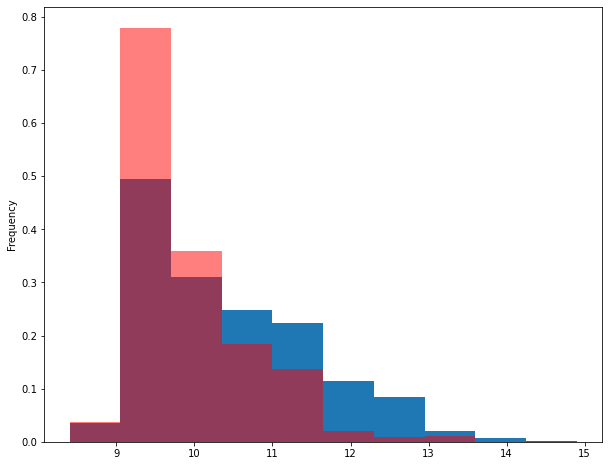

In [36]:
the_figure = redwine['alcohol'].plot.hist(figsize=(10, 8), density=True)
badwine['alcohol'].plot.hist(figsize=(10, 8), color='red', density=True, alpha=0.5)